In [1]:
#Step 1a: (1) import pandas; (2) read csv file as a dataframe; (3) print data to check its format
import pandas as pd
df = pd.read_csv('data.csv')
print(df)

          x1         x2          y
0   3.064710   6.799351  19.539787
1   8.662211   5.177079  32.544799
2   3.558543   9.637783  18.139693
3   8.320039  13.340415  22.566879
4   7.482303   3.352992  31.770764
5   4.425246   9.423697  18.942667
6   6.592693   9.571301  21.610805
7   1.367884   7.813275  13.182695
8   1.470329   4.592275  19.781764
9   8.113782   8.182681  27.706600
10  8.106076  13.351301  21.915612
11  4.323920   5.326015  23.737483
12  0.811980  13.834745   5.234168
13  3.851789   6.620045  21.045225
14  7.038050   7.635967  25.038879
15  0.096878  14.385837   6.353449
16  8.275902  11.746995  25.920937
17  0.407700   3.808918  15.559531
18  7.403751  14.900942  19.665290
19  3.931122   7.975347  21.780109
20  5.090712   9.244410  21.236082
21  5.882338   6.143854  25.100181
22  4.162991   5.454736  23.413761
23  7.300757  12.579513  22.244632
24  6.069065   8.346753  22.369987
25  5.763634   3.259713  27.564240
26  4.332696   7.803195  19.187851
27  7.660694   4.439

In [2]:
#Step 1b: define our dependent (y) and independent (x) variables from our dataframe
y = df['y']
x = df[['x1','x2']]

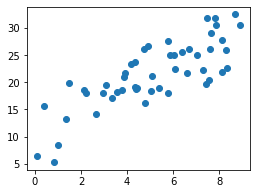

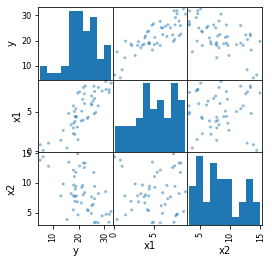

In [3]:
#Step 2: Visualize relationships. 
    #For example, are x1 and x2 correlated (i.e., collinearity), which is important for model estimation? 
    #We can do so thru two means: (1) via matplotlib, we initialize and create a scatter plot figure that we 'show'; 
    #(2) we can create a scatter matrix between our variables of interest.
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.scatter(df['x1'],df['y'])
pd.plotting.scatter_matrix(df[['y','x1','x2']],figsize=(4, 4))
plt.show()

In [4]:
#Step 3: Fit our data to a regression model. We will do so via statsmodels, which has a series of linear models available.
    #Here we (1) import statsmodel; (2) add a constant should we want an intercept term; (3) specify a linear model
    #that is estimated via ordinary least squares; and (4) fit the model.
import statsmodels.api as sm
x = sm.add_constant(x)
reg = sm.OLS(y, x)
reg_fit = reg.fit()

#Step 4: Here we view the summary results for our model. Note that some important metrics of interest include:
    #1. R2: A measure of explained variation within our dataset via the model.
    #2. Other goodness-of-fit measures: (1) log-likelihood (i.e., likelihood of observing data given the fitted model); (2) Akaike and Bayesian Information Criterion, which extends log-likelihood by including a penalty term based on the number of model parameters
    #3. Coefficient estimates, their standard errors (i.e., uncertainty measures), and p-values for statistical inference.
    #4. Evaluation of fit according to whether residuals are either normally distributed (e.g., Omnibus and Jarque-Bera) and autocorrelation in residuals (e.g., Durbin-Watson)
reg_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     801.2
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           4.87e-37
Time:                        20:36:38   Log-Likelihood:                -71.413
No. Observations:                  50   AIC:                             148.8
Df Residuals:                      47   BIC:                             154.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7007      0.507     38.824      0.000      18.680      20.721
x1             2.0334      0.062     32.875      0.000       1.909       2.158
x2            -1.0342      0.045    -23.161      0.000      -1.124      -0.944
==============================================================================
Omnibus:                        0.988   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.892
Skew:                           0.077   Prob(JB):                        0.640
Kurtosis:                       2.364   Cond. No.                         35.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

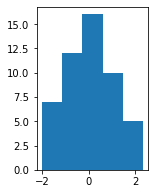

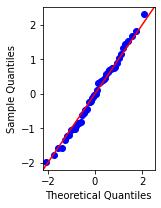

In [5]:
#Step 5: Evaluate fit. To evaluate fit, we will store our regression residuals and create a histogram and
    #quantile-quantile plot to see that the data follows a normal distribution. 
residuals = reg_fit.resid
plt.rc("figure", figsize=(2,3))
plt.hist(residuals, bins = 5)
sm.qqplot(residuals, fit = True, line='45')
plt.show()

In [6]:
#Step 6: We can also use our model for prediction. In the below case, we are predicting the expected value of 'y'
    #given that x1 and x2 take on the value of 3 and 2, respectively. This is based on our parameter estimates.
    #Note that '1' is the first item in our list for the method 'predict()'.
    #This is because our first term is our intercept, which should be multipled by 1.
print(reg_fit.params)
x1, x2 = 3, 2
print(reg_fit.predict(([1,x1,x2])))

const    19.700660
x1        2.033393
x2       -1.034205
dtype: float64
[23.73242826]
